# Interactive Linguistic Essay

The aim of this essay is to present a script that performs **text preprocessing** and **processing** by means of the **NLTK library** and other modules. 

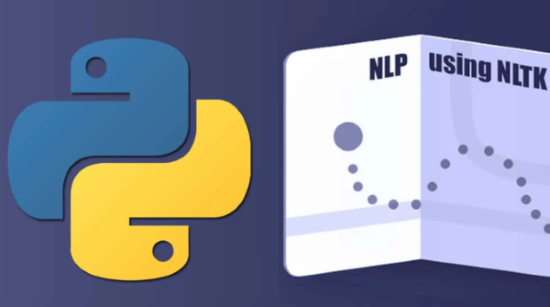

The textual data used for this analysis comes from the **[VALORANT's website.](https://playvalorant.com/en-us/news/announcements/beginners-guide/)**

### Data collection
First, the text data is extracted using the **Web Scraping technique.**

In [65]:
import requests

In [66]:
page = requests.get("https://playvalorant.com/en-us/news/announcements/beginners-guide/")


We can view the content of the page with the use of the following code:

In [67]:
#print(page.content)

### Data preprocessing and processing procedures
The next step is to use **BeautifulSoup** to clean our text data and make it more readable and nicely formatted.

In [68]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In order to print out the HTML content of our page, we can use the **prettify method** on our **BeautifulSoup** object:

In [69]:
#print(soup.prettify())

Then, we use the below codes to: 
<ul>
    <li>find all paragraphs in our text data and view them</li>
    <li>make sure we get only the text data that we need for our analysis</li>

In [70]:
paras = soup.find_all('p')

In [71]:
#print(paragraphs)

In [72]:
only_text = []
for para in paras:
    processed_para = para.get_text()
    processed_para = processed_para.strip()
    if len(processed_para) > 1:
        only_text.append(processed_para)
print(only_text)

["Straight from the files of Brimstone, this is the VALORANT Beginner’s Guide. Whether this is your first rotation or you're needing a refresher, we figure it’s best you take it from the Agent who’s seen it all before.", 'Below is what to know before your first game. Pay attention. Might learn something.', 'Before you enter your first round, you get to pick from a group of Agents, each with their own role and special skills designed to work alongside each other toward a win. You can dig into the specifics of each Agent on our Agents page.', 'After everyone selects their Agent (oh, you picked that one), you’ll jump into a random map and formally enter the first round.', 'Start a round as either attacker or defender and switch sides in between. Before you do either, you’ll need to navigate the buy phase, which lets you purchase weapons and abilities. What you buy shapes how you can win. Let style or matchups guide your choices.', 'No one’s going to tell you how to spend your money, but y

Now we can convert our list to a string. Doing so, we make it possible to conduct further preprocessing procedures on our data.

In [73]:
text = ' '.join(only_text)

After that, we can move on to other preprocessing procedures. First, we are going to convert our text to lowercase.

In [74]:
lower_case = text.lower()

The next step is to clean our text from punctuation marks.

In [75]:
import string
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

Now, we can divide our text into single words(or tokens) in the process of **tokenization**.

In [76]:
import nltk
from nltk import word_tokenize
tokenized_words = word_tokenize(cleaned_text, "english")

The next step is to remove **stop words** from our data, as they are meaningless to the analysis.

In [77]:
from nltk.corpus import stopwords
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

Now we can view our tokens and proceed to the further analysis of our text.

In [78]:
print(final_words)

['straight', 'files', 'brimstone', 'valorant', 'beginner', '’', 'guide', 'whether', 'first', 'rotation', 'youre', 'needing', 'refresher', 'figure', '’', 'best', 'take', 'agent', '’', 'seen', 'know', 'first', 'game', 'pay', 'attention', 'might', 'learn', 'something', 'enter', 'first', 'round', 'get', 'pick', 'group', 'agents', 'role', 'special', 'skills', 'designed', 'work', 'alongside', 'toward', 'win', 'dig', 'specifics', 'agent', 'agents', 'page', 'everyone', 'selects', 'agent', 'oh', 'picked', 'one', '’', 'jump', 'random', 'map', 'formally', 'enter', 'first', 'round', 'start', 'round', 'either', 'attacker', 'defender', 'switch', 'sides', 'either', '’', 'need', 'navigate', 'buy', 'phase', 'lets', 'purchase', 'weapons', 'abilities', 'buy', 'shapes', 'win', 'let', 'style', 'matchups', 'guide', 'choices', 'one', '’', 'going', 'tell', 'spend', 'money', '’', 'going', 'pull', 'trigger', 'point', '’', 'gun', 'every', 'situation', 'comb', 'details', 'weapon', 'dedicated', 'arsenal', 'page', 

We can check how many tokens we had before removing stop words and after doing so.

In [79]:
print(f"Number of tokens before removing stop words: {len(tokenized_words)}")
print(f"Number of tokens after removing stop words: {len(final_words)}")

Number of tokens before removing stop words: 404
Number of tokens after removing stop words: 209


We can view a frequency list of our tokens along with a plot representing the data. We can also create a list of the top 5 frequent words. 

In [80]:
from collections import Counter
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

Frequency list of all tokens: Counter({'’': 13, 'first': 4, 'page': 4, 'style': 4, 'agent': 3, 'round': 3, 'agents': 3, 'brimstone': 2, 'guide': 2, 'know': 2, 'might': 2, 'enter': 2, 'skills': 2, 'win': 2, 'one': 2, 'map': 2, 'either': 2, 'buy': 2, 'going': 2, 'tell': 2, 'weapon': 2, 'different': 2, 'maps': 2, 'ways': 2, 'keep': 2, 'always': 2, 'straight': 1, 'files': 1, 'valorant': 1, 'beginner': 1, 'whether': 1, 'rotation': 1, 'youre': 1, 'needing': 1, 'refresher': 1, 'figure': 1, 'best': 1, 'take': 1, 'seen': 1, 'game': 1, 'pay': 1, 'attention': 1, 'learn': 1, 'something': 1, 'get': 1, 'pick': 1, 'group': 1, 'role': 1, 'special': 1, 'designed': 1, 'work': 1, 'alongside': 1, 'toward': 1, 'dig': 1, 'specifics': 1, 'everyone': 1, 'selects': 1, 'oh': 1, 'picked': 1, 'jump': 1, 'random': 1, 'formally': 1, 'start': 1, 'attacker': 1, 'defender': 1, 'switch': 1, 'sides': 1, 'need': 1, 'navigate': 1, 'phase': 1, 'lets': 1, 'purchase': 1, 'weapons': 1, 'abilities': 1, 'shapes': 1, 'let': 1, '

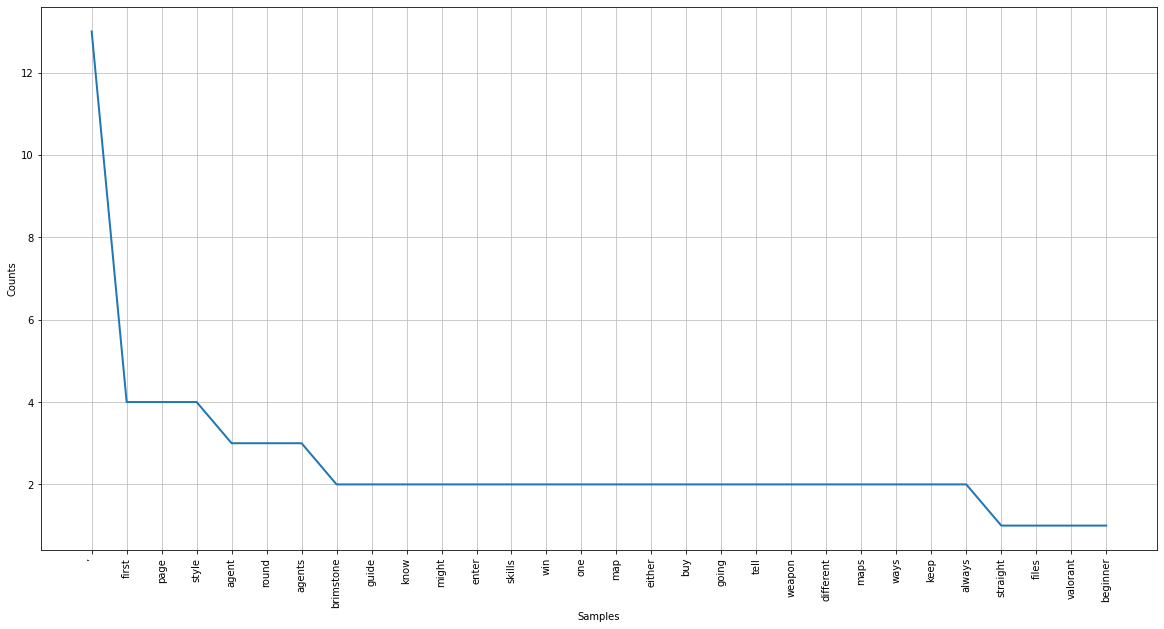

In [81]:
counts = Counter(final_words)
print(f"Frequency list of all tokens: {counts}")

fdist = FreqDist(final_words)

print(f"Most frequent (top 5) words: {fdist.most_common(5)}")

plt.rcParams["figure.figsize"] = (20,10)
fdist = FreqDist(final_words)
fdist.plot(30, cumulative=False)
plt.show()

We can now proceed to a process called **Named Entity Recognition (NER).** 

In [82]:
named_entities = []
for sent in nltk.sent_tokenize(text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            named_entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))
if len(named_entities) > 0:
    print(f"Classified entities from the text: {named_entities}")
else:
    print(f"Sorry, no entities were categorized for your text.")

Classified entities from the text: [('GPE', 'Brimstone'), ('ORGANIZATION', 'VALORANT Beginner'), ('PERSON', 'Guide'), ('GPE', 'Below'), ('GPE', 'Pay'), ('GPE', 'Might'), ('GPE', 'Agents'), ('GPE', 'Flex'), ('PERSON', 'Brimstone'), ('PERSON', 'Maps'), ('ORGANIZATION', 'FPS')]


Apart from using the NLTK library, we can also use **Spacy** to conduct the same process and see how the outputs differ.

In [83]:
import spacy
from spacy import displacy
import en_core_web_sm
NER = spacy.load("en_core_web_sm")

In [84]:
text1= NER(text)
for word in text1.ents:
    print(word.text,word.label_)

Brimstone ORG
first ORDINAL
first ORDINAL
first ORDINAL
Agents ORG
first ORDINAL
six CARDINAL
Sunday DATE
Brimstone ORG
Agents NORP
Maps ORG
Bylines ORG
FPS ORG


Another process we can conduct on our data is **tagging.** Using the below code we do that on our list of tokens without the stop words.

In [85]:
tagged_words1 = []

for sentence in final_words:
    tokenized = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokenized)
    for item in tagged:
        tagged_words1.append(item)

print(tagged_words1)
print(f"Number of tagged words: {len(tagged_words1)}")

[('straight', 'NN'), ('files', 'NNS'), ('brimstone', 'NN'), ('valorant', 'NN'), ('beginner', 'NN'), ('’', 'NN'), ('guide', 'NN'), ('whether', 'IN'), ('first', 'RB'), ('rotation', 'NN'), ('youre', 'NN'), ('needing', 'VBG'), ('refresher', 'NN'), ('figure', 'NN'), ('’', 'NN'), ('best', 'JJS'), ('take', 'VB'), ('agent', 'NN'), ('’', 'NN'), ('seen', 'VBN'), ('know', 'VB'), ('first', 'RB'), ('game', 'NN'), ('pay', 'NN'), ('attention', 'NN'), ('might', 'MD'), ('learn', 'NN'), ('something', 'NN'), ('enter', 'NN'), ('first', 'RB'), ('round', 'NN'), ('get', 'VB'), ('pick', 'NN'), ('group', 'NN'), ('agents', 'NNS'), ('role', 'NN'), ('special', 'JJ'), ('skills', 'NNS'), ('designed', 'VBN'), ('work', 'NN'), ('alongside', 'RB'), ('toward', 'IN'), ('win', 'NN'), ('dig', 'NN'), ('specifics', 'NNS'), ('agent', 'NN'), ('agents', 'NNS'), ('page', 'NN'), ('everyone', 'NN'), ('selects', 'NNS'), ('agent', 'NN'), ('oh', 'NN'), ('picked', 'NNS'), ('one', 'CD'), ('’', 'NN'), ('jump', 'NN'), ('random', 'NN'), (

Now we will take stop words under consideration.

In [86]:
tagged_words2 = []

for sentence in only_text:
    tokenized = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokenized)
    for item in tagged:
        tagged_words2.append(item)

print(tagged_words2)
print(f"Number of tagged words: {len(tagged_words2)}")

[('Straight', 'RB'), ('from', 'IN'), ('the', 'DT'), ('files', 'NNS'), ('of', 'IN'), ('Brimstone', 'NNP'), (',', ','), ('this', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('VALORANT', 'NNP'), ('Beginner', 'NNP'), ('’', 'NNP'), ('s', 'VBD'), ('Guide', 'NNP'), ('.', '.'), ('Whether', 'PRP$'), ('this', 'DT'), ('is', 'VBZ'), ('your', 'PRP$'), ('first', 'JJ'), ('rotation', 'NN'), ('or', 'CC'), ('you', 'PRP'), ("'re", 'VBP'), ('needing', 'VBG'), ('a', 'DT'), ('refresher', 'NN'), (',', ','), ('we', 'PRP'), ('figure', 'VBP'), ('it', 'PRP'), ('’', 'VBZ'), ('s', 'JJ'), ('best', 'IN'), ('you', 'PRP'), ('take', 'VBP'), ('it', 'PRP'), ('from', 'IN'), ('the', 'DT'), ('Agent', 'NNP'), ('who', 'WP'), ('’', 'VBP'), ('s', 'VBP'), ('seen', 'VBN'), ('it', 'PRP'), ('all', 'DT'), ('before', 'IN'), ('.', '.'), ('Below', 'NNP'), ('is', 'VBZ'), ('what', 'WP'), ('to', 'TO'), ('know', 'VB'), ('before', 'IN'), ('your', 'PRP$'), ('first', 'JJ'), ('game', 'NN'), ('.', '.'), ('Pay', 'NNP'), ('attention', 'NN'), ('.', '.'),

The next step is to count the occurrences of parts of speech. To do that, we will use tagged_words2 - a version which includes stop words. Afterward, we will visualize our data by providing a plot.

{'RB': 11, 'IN': 47, 'DT': 35, 'NNS': 28, 'NNP': 15, ',': 23, 'VBZ': 11, 'VBD': 2, '.': 26, 'PRP$': 18, 'JJ': 26, 'NN': 67, 'CC': 19, 'PRP': 30, 'VBP': 18, 'VBG': 7, 'WP': 3, 'VBN': 5, 'TO': 11, 'VB': 29, 'MD': 7, '(': 1, 'UH': 2, 'CD': 2, ')': 1, 'WDT': 2, 'WRB': 5, 'EX': 1, 'JJR': 2, 'JJS': 2, 'RBR': 1, ':': 1}


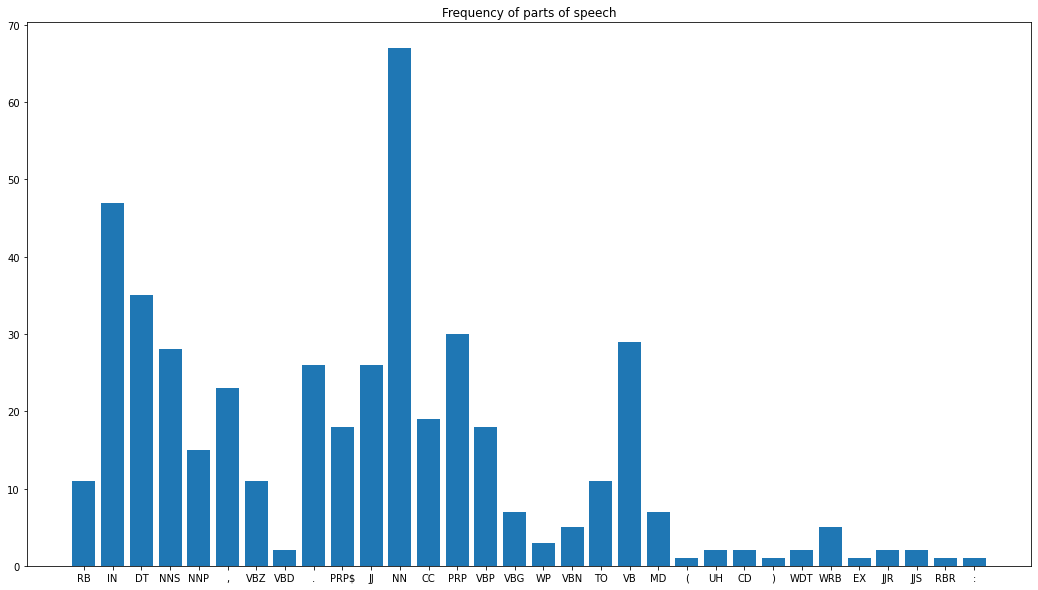

In [87]:
counter_dict = {}
for item in tagged_words2:
    if item[1] not in counter_dict:
        counter_dict[item[1]] = 1
    else:
        counter_dict[item[1]] += 1

print(counter_dict)

plt.rcParams["figure.figsize"] = (18,10)
plt.bar(counter_dict.keys(), counter_dict.values())
plt.title('Frequency of parts of speech')
plt.show()

### Conclusion
The above script demonstrates that the Natural Language Toolkit is a great tool for Natural Language Processing. It allows us to conduct processes, such as tokenization, tagging, identifying named entities, and many more. We can also use NLTK to check the frequency of words appearing in our text data. Apart from that, NLTK provides access to corpora and lexical resources, such as WordNet. Overall, NLTK makes it possible for us to easily preprocess and analyze texts. 